#  0.0 Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)

# 1.0 pd.read_csv

In [2]:
#Importei o dataset e verifiquei suas primeiras 50 lindas
df = pd.read_csv('data/attacks.csv', encoding= "ISO-8859-1")
pd.set_option('display.max_columns', 500)

df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


# 2.0 Data cleaning

### 3.1 Drop columns 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
df = df.drop(columns=['Case Number', 'Date', 'Location', 'Name', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.2', 'Case Number.1', 'Unnamed: 22', 'Unnamed: 23', 'Type', 'Area', 'Injury', 'Fatal (Y/N)', 'Species ', 'original order'])
df.dropna(axis=0, thresh = 2).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      6300 non-null   float64
 1   Country   6252 non-null   object 
 2   Activity  5758 non-null   object 
 3   Sex       5737 non-null   object 
 4   Age       3471 non-null   object 
dtypes: float64(1), object(4)
memory usage: 295.4+ KB


### 3.2 Data cleaning ['Year´]

In [5]:
df['Year'].unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

**Alterei a coluna Year de object para float64**

In [6]:
def te_float(value):
    try:
        return float(value)
    except ValueError as e: #Dúvida, o que é o **e**
        return np.nan
    
df['Year'].map(te_float) 

0        2018.0
1        2018.0
2        2018.0
3        2018.0
4        2018.0
          ...  
25718       NaN
25719       NaN
25720       NaN
25721       NaN
25722       NaN
Name: Year, Length: 25723, dtype: float64

**Indexando a coluna atualizada no dataframe original**

In [7]:
df['Year'] = df['Year'].map(te_float)

### 3.3 Data Cleaning ['Age´]

In [8]:
df['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [9]:
df['Age'] = df['Age'].replace(to_replace=r'[^\w\s]', value='')

df.Age.replace({'Teen ': '16',     
               '18 months': '2', 
               '30s': '35',
               '50s': '50',
               'teen ': '16',
               '18 or 20': '19', 
               '12 or 13': '12',
               '28 23  30': '28',
               'Teens ': '16',
               '36  26': '31', 
               '8 or 10': '9',
               '\xa0 ': 'Nan',
               '  ': 'Nan',
               '30 or 36': '33', 
               '6½': '6',
               '21  ': '21',
               '33 or 37': '35',
               'mid30s': '35',
               '23  20': '21',
               ' 30': '30', 
               '7          31': 'Nan',
               ' 28': '28',
               '32  30': '31',
               '16 to 18': '17', 
               'Elderly': '65', 
               'mid20s': '25',
               'Ca 33': '33',
               '74 ': '74',
               '45 ': '45', 
               '21 or 26': '23',
               '20 ': '20',
               '18 to 22': '20',
               'adult': 'NaN', 
               '9  12': '10',
               '   19': '19', 
               '9 months': '1',
               ' 25 to 35': '30',
               '23  26': '24',
               '33  37': '35',
               '25 or 28': '26',
               '37 67 35 27    27': 'NaN',   
               '21 3424  35': '28',   
               '30  32': '31',
               '50  30': '40',
               '17  35': '26',
               'X': 'unknown',
               'middleage': '50',    
               '13 or 18': '15', 
               '34  19': '26',
               '33  26': '29',
               '2 to 3 months': '1',
               'MAKE LINE GREEN': 'NaN', 
               ' 43': '43',
               'young': '3',   
               '7 or 8': '7',
               '17  16': '16',
               'F': 'NaN',
               'Both 11': '11', 
               '9 or 10': '9',
               '36  23': '29',
               '  ': 'NaN',
               'AM': 'NaN', 
               '       14': '14',
               '10 or 12': '11',    
               '31 or 33': '32',
               '2½': '2',
               '13 or 14': '13',   
               '40s': '45',
               'Teen': 'NaN',
               '60s': '65',
               'teen': 'NaN',
               'Teens': 'NaN',
               ' ': 'NaN',
               '  19': '19',
               '25 to 35': '30'
              }, inplace=True)

**Indexando a coluna atualizada no dataframe original**

In [10]:
df['Age'] = df['Age'].map(te_float)

### 3.4 Data Cleaning ['Activity']

In [11]:
df['Activity'].unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [12]:
df['Activity'].str.lower()

def atividade(x):
    try:
        return str(x)
    except ValueError as e:
        return 'não preenchido'
    
df['Activity'] = df['Activity'].map(atividade)

In [13]:
df_desc = df[~df['Activity'].str.contains('spearfishing|surfing|fishing|swimming|wading|standing|diving|desconhecido|kayaking|walking')]

In [14]:
df['Activity'] = df['Activity'].replace({'body boarding':'surfing',
                                         'stading':'surfing',
                                         'nan':'desconhecido',
                                         'standing alongside surfboard':'surfing',
                                         'snorkeling': 'diving',
                                         'scuba diving':'diving',
                                         'boogie boarding':'surfing',
                                         'free diving ': 'diving',
                                         'sitting on surfboard': 'surfing',
                                         'surf-skiing':'kayaking',
                                         'paddleskiing':'kayaking',
                                         'paddle boarding':'surfing',
                                         'surf skiing':'kayaking',
                                         'treading water':'walking',
                                         'playing in the surf':'surfing',
                                         'jumping':'jumping in the water',
                                         'wreck / technical diving':'diving',
                                         'surfing, fell off surfboard & stepped on the shark':'surfing',
                                         'floating face-down in knee-deep water':'floating',
                                         'batin':'unknown',
                                         'unknown':'unknown',
                                         'bathing':'swimming',
                                         'surfing, fell off surfboard & stepped on the shark.':'surfing',
                                         'walking in shallows':'walking',
                                         'diving (shell maintenance)':'diving',
                                         'scuba diving & feeding fish':'diving',
                                         'swimming / wading':'swimming',
                                         'swimming /  boogie boarding':'swimming',
                                         'attempting to catch a crocodile':'other',
                                         'sitting in shallows':'in shallows',
                                         'surfing, but standing in water alongside board':'surfing',
                                         'swimming / snorkeling':'diving',
                                         'fell onto dead shark':'other',
                                         'windsurfing, but sitting on his board':'surfing',
                                         'scallop diving (using surface-supplied air & a pod) ':'diving',
                                         'fishing (drowned 2-apr-2002)':'fishing',
                                         'surfing / wading':'surfing',
                                         'spearfishing, holding mesh bag with speared fish':'spearfishing',
                                         'kneeling in the water':'in shallows',
                                         'tagging sharks':'studying the sharks',
                                         'fell into the water':'other',
                                         'teasing a shark':'other',
                                         'kiteboarding':'surfing',
                                         '3.3 m fishing boat sank. treveluwe & peter hodgson (wearing lifejackets) were drifting in the current':'shipwrecked',
                                         'spearfishing, but swimming at surface':'spearfishing',
                                         'surfing, lying on surfboard':'surfing',
                                         'wading to shore after surfing':'wading',
                                         'wading with surfboard':'surfing',
                                         'lying prone in 2\' of water':'swimming',
                                         'crabbing (spearing crabs)':'other',
                                         'fishing from prawn trawler':'fishing',
                                         'spearfishing & holding catch':'spearfishing',
                                         'swimming with dolphins':'swimming',
                                         'free diving, spearfishing':'spearfishing',
                                         'casting a net':'fishing',
                                         'fishing from prawn trawler':'fishing',
                                         'nan':'unknown',
                                         'playing in the surf with his 2 dogs':'surfing',
                                         'wading in school of baitfish':'wading',
                                         'adrift in a life jacket':'shipwrecked',
                                         'sitting':'wading',
                                         'splashing / wading':'wading',
                                         'snorkeling (filming the sardine run)':'diving',
                                         'floating on a raft':'small boat',
                                         'fishing, removing the shark from his line':'fishing',
                                         'swimming, towing a kayak':'swimming',
                                         'free diving (but on surface)':'diving',
                                         'shark fishing':'fishing',
                                         'body surfing or body boarding':'surfing',
                                         'swimming near pod of whales':'swimming',
                                         'adrift after the sinking of the motor yacht princess dianne':'shipwrecked',
                                         'boogie boarding or surfing':'surfing',
                                         'splashing':'wading',
                                         'surfing (or body boarding)':'surfing',
                                         'free diving for abalone (submerged)':'diving',
                                         'swimming (using a float)':'swimming',
                                         'fishing from surfboard':'fishing',
                                         'wading, when he stepped on the shark':'wading',
                                         'swimming / surfing':'surfing',
                                         'crayfishing':'fishing',
                                         'swimming with pod of dolphins':'swimming',
                                         'surfing (lying prone on his board)':'surfing',
                                         'snorkeling  hunting crayfish and abalone':'diving',
                                         'swimming, wearing black wetsuit & swim fins':'swimming',
                                         'walking, carrying surfboard & stepped on shark':'walking',
                                         'standing, stepped on shark':'wading',
                                         'swimming or paddle boarding':'unknown',
                                         'scuba diving (submerged riding a scooter)':'diving',
                                         'body boarding or surfing':'surfing',
                                         'swimming underwater from crayfish cage to a fishing bait':'fishing',
                                         'wading near a fishing net':'wading',
                                         'walking / surfing':'unknown',
                                         'floating on raft':'small boat',
                                         'wading / surfing':'unknown',
                                         'diving & force-feeding the shark':'diving',
                                         'tandem surfing':'surfing',
                                         'surfing amid a shoal of sharks':'surfing',
                                         'body surfing, stood up on sandbar':'surfing',
                                         'rowing ':'other',
                                         'floating in inner tube':'floating',
                                         'swimming, poaching perlemoen':'swimming',
                                         'boogie-boarding / swimming':'surfing',
                                         'swimming near his boat':'surfing',
                                         'wading / fishing & carrying a bag of fish':'fishing',
                                         'scuba diving for abalone (at surface)':'diving',
                                         'tech diving ':'diving',
                                         'chumming':'fishing',
                                         'surfing / swimming':'unknown',
                                         'scurfing (surfboard being  towed behind a boat)':'surfing',
                                         'swimming breast stoke':'swimming',
                                         'fishing in knee-deep water':'fishing',
                                         'sea disaster':'shipwrecked',
                                         'diving in aquarium display tank':'diving',
                                         'chumming for white sharks':'fishing',
                                         'dived naked into the water on a bet':'swimming',
                                         'swimming in fish tank':'swimming',
                                         'floating on a small orange raft ':'small boat',
                                         'swimming with boogie board':'swimming',
                                         'spearfishing (free diving)':'spearfishing',
                                         'swimming with mask & snorkel':'diving',
                                         'playing / standing':'wading',
                                         'holding onto an inflatable boat':'small boat',
                                         'abalone diving using hookah (near calving whales)':'diving',
                                         'abalone diving using hookah (resting on the surface)':'diving',
                                         'on a float':'small boat',
                                         'scuba diving (ascending using scooter)':'diving',
                                         '\"riding waves on a board\"':'surfing',
                                         'reviving a sedated shark':'other',
                                         'floating near boat & observing bioluminesce':'floating',
                                         'wading?':'wading',
                                         'floating':'floating',
                                         'playing on a sandbar':'playing',
                                         'swimming / jumping off a jetty':'jumping in the water',
                                         'removing fish from a trap':'fishing',
                                         'free diving / modeling':'diving',
                                         'playing soccer in the water':'playing',
                                         'accidentally stood on hooked shark\'s tail before attempting to gut it ':'other',
                                         'filming & feeding captive sharks':'filming',
                                         'diving for crayfish':'diving',
                                         'shark tagging':'studying the sharks',
                                         'treading water/ surfing':'surfing',
                                         'fishing from surfski':'fishing',
                                         'boogie boarding, kicked at object in the water':'surfing',
                                         'treading water/ surfing':'surfing',
                                         'swimming, towing surfboard':'swimming',
                                         'playing / jumping':'jumping in the water',
                                         'murder victim':'other',
                                         'diving, but on the surface when bitten by the shark':'diving',
                                         'scuba diving & spearfishing':'spearfishing',
                                         'jumped off rocks into white water':'jumping in the water',
                                         'surfing, fell off surfboard':'surfing',
                                         'commercial diver (submerged or treading water)':'diving',
                                         'crawling':'in shallows',
                                         'skindiving':'diving',
                                         'swimming, after falling off towed kneeboard':'swimming',
                                         'removing shark from tank in nightclub ':'other',
                                         'swimming, attempting to rescue a girl  believed to be drowning':'swimming',
                                         'skindiving,':'diving',
                                         'hookah diving':'diving',
                                         'paddle-boarding':'surfing',
                                         'thrashing the water / imitating the shark victim from \"jaws\"':'playing',
                                         'free diving for abalone (ascending)':'diving',
                                         'paddling on surfboard or body board':'surfing',
                                         'riding floatation device':'other',
                                         'paddling on kneeboard':'surfing',
                                         'hookah diving for abalone (submerged)':'diving',
                                         'floating on his back':'floating',
                                         'pushed surfmat of a young girl out of the shark\'s path, drawing shark\'s attention to his own board':'surfing',
                                         'scuba diving ':'diving',
                                         'snorkeling, carrying a speared fish in her hand':'diving',
                                         'walking in surf':'surfing',
                                         'scuba diving (submerged)':'diving',
                                         'free diving & spearfishing (ascending)':'spearfishing',
                                         'swimming behind sailboat':'swimming',
                                         'swimming from makeshift raft  to life vest after fishing boat sank':'swimming',
                                         'finning the shark that bit him':'unknown',
                                         'free diving / spearfishing, from paddleboard & floating on the surface':'diving',
                                         'surfing (or sailboarding)':'surfing',
                                         'cleaning fish':'other',
                                         'fly fishing':'unknown',
                                         'scuba diving at seal colony':'diving',
                                         'lying on surfboard & paddling':'surfing',
                                         'resting on surfboard':'surfing',
                                         'snorkeling, possibly holding a fish':'diving',
                                         'marathon swimming':'swimming',
                                         'free diving for trochus':'diving',
                                         'fishing - \'tag & release\'':'fishing',
                                         'dragging stranded shark into deeper water':'other',
                                         'standing ':'wading',
                                         'fishing, stepped on hooked shark\'s head':'fishing',
                                         'swimming in canal':'swimming',
                                         'bodyboarding':'surfing',
                                         'attempting to lasso shark\'s tail':'fishing',
                                         'surfing / treading water':'surfing',
                                         'lying atop surfboard':'surfing',
                                         'scuba diving for scallops':'surfing',
                                         'kite boarding':'kitesurf',
                                         'board sailing':'kitesurf',
                                         'sittting in water with his child':'wading',
                                         'adrift after ditching plane in the sea':'other',
                                         'free diving  & spearfishing (submerged)':'spearfishing',
                                         'measuring sharks':'other',
                                         'racing ski':'other',
                                         'spearfishing on scuba':'spearfishing',
                                         'wading or swimming':'unknown',
                                         'floating on inner tube after diving for lobster':'floating',
                                         'standing in waist-deep water, helping his father tend a gill net containing dead fish':'fishing',
                                         'paddling on surfboard':'surfing',
                                         'scuba diving for lobster (at surface)':'diving',
                                         'free diving for scallops':'diving',
                                         'playing in knee-deep water':'playing',
                                         'sitting in the water':'in shallows',
                                         'diving, feeding sharks':'diving',
                                         'surfing with dolphins':'surfing',
                                         'feeding fish':'other',
                                         'filming 5\' blue shark':'filming',
                                         'hookah diving for abalone (descending)':'diving',
                                         'jumping in the waves':'jumping in the water',
                                         'lying on surfboard':'surfing',
                                         'standing or boogie boardin':'surfing',
                                         'washing sand off a speared fish':'other',
                                         'wakeboarding':'other',
                                         'surf fishing':'fishing',
                                         'standing in inner tube':'swimming',
                                         'swimming after boat became disabled':'swimming',
                                         'stand-up paddleboarding':'surfing',
                                         'shark diving':'diving',
                                         'surfing or body surfing':'surfing',
                                         'boat capsized?':'shipwrecked',
                                         'sailing on catamaran & fell into the water':'other',
                                         'towing her sister on plastic ski board':'other',
                                         'collecting fish from net':'fishing',
                                         'diving ':'diving',
                                         'floating ':'floating',
                                         '40\' fishing boat sank':'shipwrecked',
                                         'free diving for abalone (surfacing)':'diving',
                                         'floating on an inflatable raft':'small boat',
                                         'swimming, after single-engine aircraft went down in the sea':'swimming',
                                         'explosion destroyed 28\' boat, survivors in the water':'shipwrecked',
                                         'floating on inner tube raft':'floating',
                                         'floating with life preserver after his boat foundered':'shipwrecked',
                                         'commercial spearfishing':'spearfishing',
                                         'during a shark fishing tournament, the 18\' boatem was capsized by waves, throwing 3 men into the water ':'shipwrecked',
                                         'standing / wading':'wading',
                                         'swimming or boogie boarding':'unknown',
                                         '16\' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore':'shipwrecked',
                                         'diving to untangle a crab trap line from boat\'s propeller':'diving',
                                         'spearfishing':'spearfishing',
                                         'free diving for abalone from zodiac (submerged)':'diving',
                                         'snorkeling on surface':'diving',
                                         'floating on air mattress':'floating',
                                         'm prawn trawler new venture capsized  & sank in heavy seas three people in the water':'shipwrecked',
                                         'diving for lobsters':'diving',
                                         'kite surfing':'kitesurf',
                                         'kayak fishing':'kayaking',
                                         'jumped into the water':'jumping in the water',
                                         'their 9 m launch was run down by a 25,000-ton japanese freighter  on the night of 3-11-1977 & they drifted, clinging to an icebox for 2 days':'other',
                                         'surfing ':'surfing',
                                         'explosion destroyed 28\' boat, survivors in the water':'shipwrecked',
                                         'spearfishing ':'spearfishing',
                                         'surfing & dangling foot in water amid baitfish':'surfing',
                                         '14 m prawn trawler new venture capsized  & sank in heavy seas three people in the water':'shipwrecked',
                                         'explosion destroyed 28\' boat, survivors in the water ':'shipwrecked',
                                         'surfing & dangling foot in water amid baitfish':'surfing',
                                         'playing ':'playing',
                                         'spearfishing / scuba diving':'spearfishing',
                                         'swimming from the new venture ':'swimming',
                                         'the christie v sank on 11/6/1988, survivors were adrift on a dinghy':'shipwrecked',
                                         'surfing, collided with shark':'surfing',
                                         'water-skiing':'other',
                                         'hookah diving for sea urchins':'surfing',
                                         'surfing, paddling seawards':'surfing',
                                         'swimming / body surfing':'surfing',
                                         'lifesaving drill':'other',
                                         'body-boarding':'surfing',
                                         'kayaking / fishing':'fishing',
                                         'scuba diving for abalone':'diving',
                                         'fishing for sharks':'fishing',
                                         'walking out of the water after surfing':'walking',
                                         'standing / surfing':'surfing',
                                         'free diving & spearfishing':'spearfishing',
                                         'fishing ':'fishing',
                                         'diving for abalone':'diving',
                                         'surf skiing':'kayaking',
                                         'free diving for abalone':'diving',
                                         'wade fishing':'fishing',
                                         'surfing (sitting on his board)':'surfing',
                                         'free diving':'diving',
                                         'body surfing':'surfing',
                                         'swimming ':'swimming',
                                         'scuba diving (but on surface)':'diving',
                                         'hookah diving for abalone':'diving',
                                        'spearfishing / free diving':'other'}) 

# 3.0 EDA 

### 3.1 EDA Groupby Year e Country

**Agreguei as colunas Year e Country para eu poder criar uma nova coluna chamada Nº de ataques**

In [15]:
df['Nº de ataques'] = df.groupby(by='Year')['Country'].transform('count')

**Irei estudar a partir de 1970 porque no gráfico tem um desvio muito grando na década de 60**

In [16]:
df = df.loc[df['Year'] > 1970,:]
df = df.loc[df['Year'] < 2015,:]

In [17]:
df_year_1970 = df.groupby('Year')['Country'].count().reset_index()

<AxesSubplot:xlabel='Year', ylabel='Nº de ataques'>

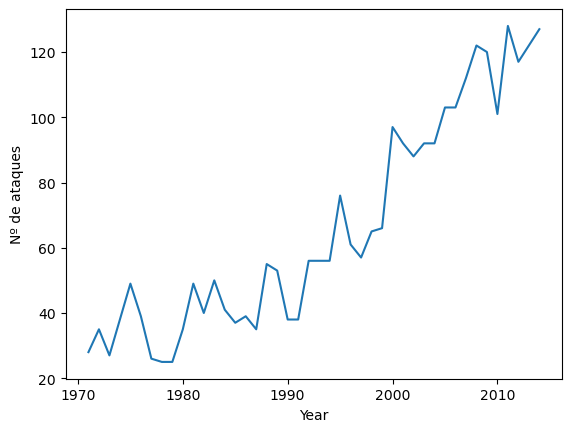

In [18]:
df_year_1970 = df.loc[df['Year'] >= 1970,:]
df_year_1970 = df.loc[df['Year'] <= 2015,:]

df_year_1970 = df.groupby(by='Year')['Nº de ataques'].count().reset_index()

sns.lineplot(data=df_year_1970, x='Year', y='Nº de ataques')

*Pelo gráfico foi possível observar que a partir de 1990 começou a ter mais mortes por tubarão por ano*

### 3.2 EDA ['Age] 

**Irei estudar a coluna Age no intervalo de 5 até 70 anos. Pelos dados fornecidos percerbi que tem poucos dados antes dos 5 anos e depois dos 70 anos**

In [19]:
df = df.loc[df['Age'] <= 70,:]
df = df.loc[df['Age'] >= 5,:]

plot_age = df.groupby(by='Age')['Nº de ataques'].count().reset_index()

<AxesSubplot:xlabel='Age', ylabel='Nº de ataques'>

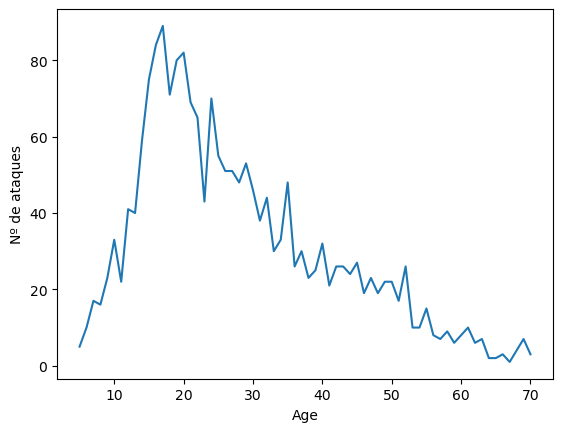

In [20]:
sns.lineplot(data=plot_age, x='Age', y='Nº de ataques')

### 3.3 EDA Groupby ['Country´] e ['Nº de ataques´]

**Agreguei as colunas Country e Nº de ataques para analizar e para posteriormente poder fazer uma nova coluna chamada Country>40. Está coluna irá filtrar apenas os países que tem mais de 40 casos de ataques de tubarões**

In [21]:
df.groupby(by='Country')['Nº de ataques'].transform('count')

464      322
467     1062
468      322
470      322
472      322
        ... 
3366       4
3367       4
3369      24
3371     322
3888       1
Name: Nº de ataques, Length: 2017, dtype: int64

In [22]:
df['Country>40'] = df.groupby(by='Country')['Nº de ataques'].transform('count')
df['Country>40'] >=40

#Indexando a máscara no DataFrame
mask_40 = df['Country>40'] >=40
df = df[mask_40].copy()

**Criando groupby**

In [23]:
plot_country = (
    df.groupby(by='Country')['Nº de ataques']
    .count()
    .sort_values()
    .reset_index()
    )

In [24]:
plot_country

,Country,Nº de ataques
0,BAHAMAS,46
1,BRAZIL,53
2,SOUTH AFRICA,227
3,AUSTRALIA,322
4,USA,1062


*Países com mais ataques de tubarão*

<AxesSubplot:xlabel='Country', ylabel='Nº de ataques'>

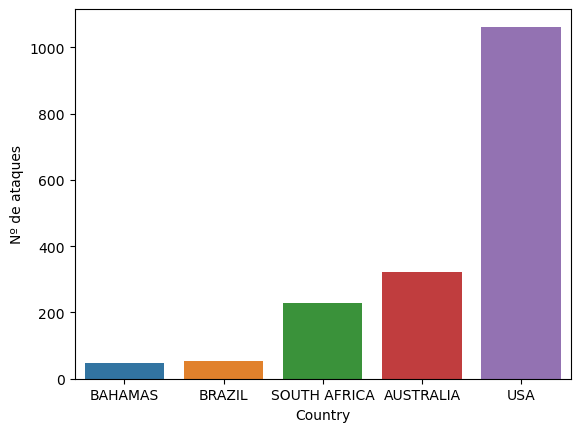

In [25]:
sns.barplot(data=plot_country, x='Country', y='Nº de ataques')

### 3.4 EDA Groupby ['Activity´] e ['Nº de ataques´]

In [26]:
df['Activity>50'] = df.groupby(by='Activity')['Nº de ataques'].transform('count')

mask_50 = df['Activity>50'] >50
df = df[mask_50].copy()

In [27]:
plot_activity = (
    df.groupby(by='Activity')['Nº de ataques']
    .count()
    .sort_values()
    .reset_index()
    )

**Atividades com mais ataques de tubarão**

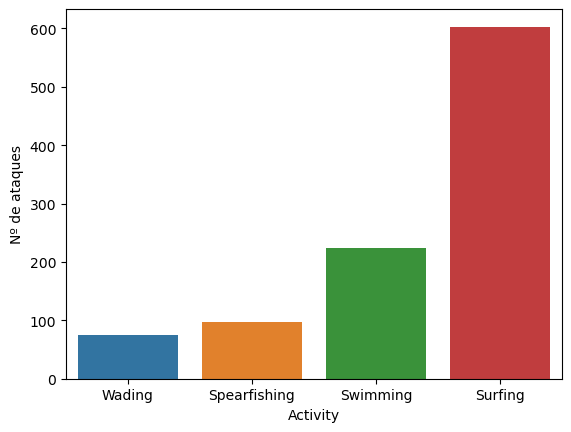

In [28]:
sns.barplot(data=plot_activity, x='Activity', y='Nº de ataques')
plt.show()

**Groupby ['Activity', 'Year'] ['Nº de ataques']**

In [33]:
plot_activity_year = (
    df.groupby(by=['Activity', 'Year'])['Nº de ataques']
    .count()
    .reset_index()
    .sort_values(by=['Activity', 'Year'])
    )

**Gráfico para comparar a difenrença no nºde ataques de tubarões por atividade**

<AxesSubplot:xlabel='Year', ylabel='Nº de ataques'>

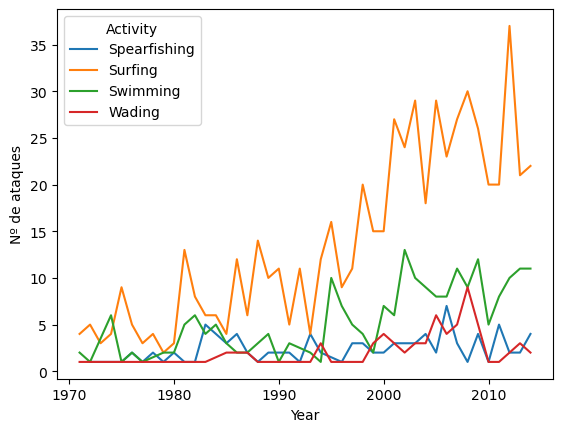

In [34]:
sns.lineplot(data=plot_activity_year, x='Year', y='Nº de ataques', hue='Activity')

### 3.4 EDA % de ataques

In [37]:
 plot_activity_year=plot_activity_year.merge(df_year_1970.rename({'Nº de ataques':'Nº de ataques anual'},axis=1), on='Year')

In [38]:
plot_activity_year['% de Ataques'] = plot_activity_year['Nº de ataques']/plot_activity_year['Nº de ataques anual']

<AxesSubplot:xlabel='Year', ylabel='% de Ataques'>

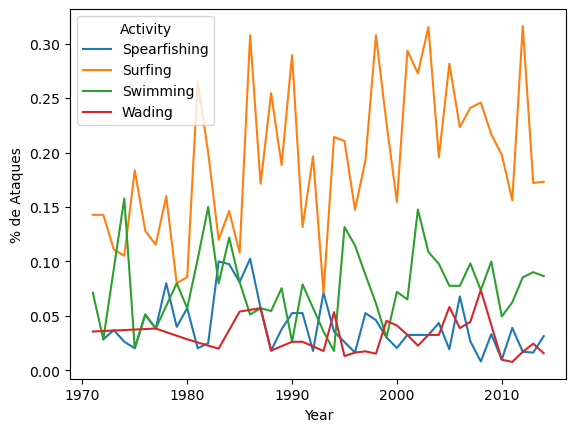

In [39]:
sns.lineplot(data=plot_activity_year, x='Year', y='% de Ataques', hue='Activity')